In [2]:
# Imports necesarios
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [3]:
# Carga el conjunto de datos desde un archivo CSV
data = pd.read_csv('drive/MyDrive/diabetes/diabetes_dataset.csv')

In [5]:
# Definir las características (X) y las etiquetas (y)
X = data.drop(columns=['Class variable (0 or 1)'])
y = data['Class variable (0 or 1)']

In [6]:
# Estandarizar los datos
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [7]:
# Sobremuestreo para tener control del desequilibrio de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_rescaled, y)

In [22]:
# Seccionar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [23]:
# Ajuste de hiperparámetros para Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [24]:
# Calcular y mostrar la precisión en el conjunto de prueba
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Precisión del Gradient Boosting en el conjunto de prueba:", accuracy_gb)

Precisión del Gradient Boosting en el conjunto de prueba: 0.8533333333333334


In [25]:
# Mostrar el informe de clasificación en el conjunto de prueba
print("Informe de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred_gb))

Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.84      0.88      0.86       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [26]:
# Calcular y mostrar la matriz de confusión en el conjunto de prueba
confusion_gb = confusion_matrix(y_test, y_pred_gb)
print("Matriz de Confusión en el conjunto de prueba:")
print(confusion_gb)

Matriz de Confusión en el conjunto de prueba:
[[124  26]
 [ 18 132]]


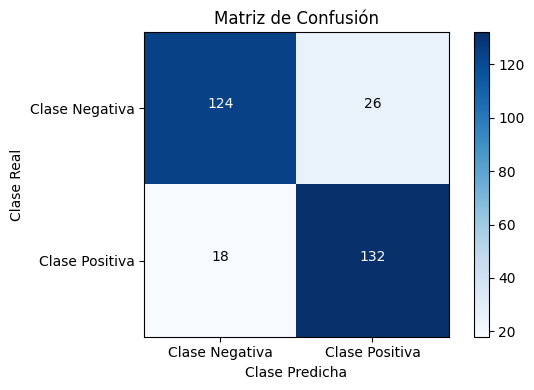

In [27]:
# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 4))
plt.imshow(confusion_gb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()

class_labels = ["Clase Negativa", "Clase Positiva"]
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(confusion_gb[i][j]), horizontalalignment="center", color="white" if confusion_gb[i][j] > confusion_gb.max() / 2 else "black")

plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")

plt.tight_layout()
plt.show()

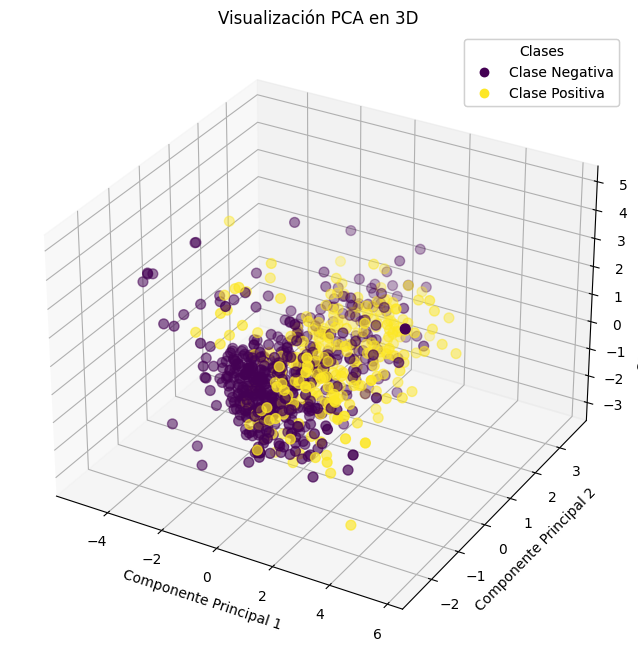

In [28]:
# Aplicar PCA para reducir a 3 dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_rescaled)

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar puntos de datos en 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=50)

# Personalizar la leyenda
legend_labels = ['Clase Negativa', 'Clase Positiva']
legend = ax.legend(handles=scatter.legend_elements()[0], title="Clases", labels=legend_labels)
ax.add_artist(legend)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Título
plt.title('Visualización PCA en 3D')
plt.show()